In [1]:
import vincent
import plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D
import folium
import ipywidgets as widgets
from ipywidgets import interact

plotly.tools.set_credentials_file(username='hwhh', api_key='N2vCMdq9jiSqdFGIzNsD')

colours = ['#009094', '#97bf0d', '#0028ff', '#68071d', '#7aa74d', '#164af9', '#615a51', '#0b4a72', '#b8101f', '#e6dbaf',
           '#e1fffe', '#0e320c', '#e3f1fd', '#f0c141', '#e44849', '#947057', '#251c38', '#5d478d', '#feb4b1', '#0000c8',
           '#f17a9c', '#ffc6d5', '#ff99cc', '#67d5ff', '#f0f8ff', '#794740', '#fab631', '#a5a44a', '#28352c', '#0e2024',
           '#37526f', '#ad1a2c', '#ba7259', '#6d9da1', '#e15c39', '#929f36', '#deb390', '#d14643', '#74737a', '#65646c',
           '#54535c', '#42404a']

regions = {'E12000001': 'North East', 'E12000002': 'North West', 'E12000003': 'Yorkshire and the Humber',
           'E12000004': 'East Midlands', 'E12000005': 'West Midlands', 'E12000006': 'East of England',
           'E12000007': 'London', 'E12000008': 'South East', 'E12000009': 'South West', 'W92000004': 'Wales'}

coordinates = {'E12000001': [54.9, -1.6], 'E12000002': [54.04, -2.79], 'E12000003': [53.95, -1.007],
               'E12000004': [52.95, -0.604], 'E12000005': [52.39, -2.04], 'E12000006': [52.316, 0.658],
               'E12000007': [51.5, -0.12], 'E12000008': [50.96, -0.65], 'E12000009': [50.9, -3.34],
               'W92000004': [52.46, -3.77]} 

occupations = {1: "Managers, Directors and Senior Officials", 2: "Professional",
               3: "Associate Professional and Technical", 4: "Administrative and Secretarial",
               5: "Skilled Trades", 6: "Caring, Leisure and Other Service", 7: "Sales and Customer Service",
               8: "Process, Plant and Machine Operatives", 9: "Elementary", -9: "Under 16 never worked"}

ages = {1: "0 to 15", 2: "16 to 24", 3: "25 to 34", 4: "35 to 44",
        5: "45 to 54", 6: "55 to 64", 7: "65 to 74", 8: "75 and over"}

economic_acts = {1: "Employee", 2: "Self-employed", 3: "Unemployed", 4: "Full-time student",
                 5: "Retired", 6: "Student", 7: "Looking after home or family",
                 8: "Long-term sick or disabled", 9: "Other", -9: "Aged under 16 or students"}

hours_worked = {1: "15 or less hours", 2: "16 to 30 hours", 3: "31 to 48 hours", 4: "49 or more hours", -9: "Under 16, student or not working"}

In [2]:
def analyse(df):
    print('Total no of records: ', df.shape[0])
    print(df.groupby('Region').size(), '\n')
    print(df.groupby('Residence Type').size(), '\n')
    print(df.groupby('Family Composition').size(), '\n')
    print(df.groupby('Population Base').size(), '\n')
    print(df.groupby('Sex').size(), '\n')
    print(df.groupby('Age').size(), '\n')
    print(df.groupby('Marital Status').size(), '\n')
    print(df.groupby('Student').size(), '\n')
    print(df.groupby('Country of Birth').size(), '\n')
    print(df.groupby('Health').size(), '\n')
    print(df.groupby('Ethnic Group').size(), '\n')
    print(df.groupby('Religion').size(), '\n')
    print(df.groupby('Economic Activity').size(), '\n')
    print(df.groupby('Occupation').size(), '\n')
    print(df.groupby('Industry').size(), '\n')
    print(df.groupby('Hours worked per week').size(), '\n')
    print(df.groupby('Approximated Social Grade').size(), '\n')

In [3]:
def read_csv(file_name):
    df = pd.read_csv(file_name, error_bad_lines=False)
    df = df[df['Region'].isin(
        ['E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005',
         'E12000006', 'E12000007', 'E12000008', 'E12000009', 'W92000004'])]
    df = df[df['Residence Type'].isin(['C', 'H'])]
    df = df[df['Family Composition'].isin([1, 2, 3, 4, 5, 6, -9])]  # can change to: list(range(0, x).append(-9)
    df = df[df['Population Base'].isin([1, 2, 3])]
    df = df[df['Sex'].isin([1, 2])]
    df = df[df['Age'].isin([1, 2, 3, 4, 5, 6, 7, 8])]
    df = df[df['Marital Status'].isin([1, 2, 3, 4, 5])]
    df = df[df['Student'].isin([1, 2])]
    df = df[df['Country of Birth'].isin([1, 2, -9])]
    df = df[df['Health'].isin([1, 2, 3, 4, 5, -9])]
    df = df[df['Ethnic Group'].isin([1, 2, 3, 4, 5, -9])]
    df = df[df['Religion'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, -9])]
    df = df[df['Economic Activity'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, -9])]
    df = df[df['Occupation'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, -9])]
    df = df[df['Industry'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -9])]
    df = df[df['Hours worked per week'].isin([1, 2, 3, 4, -9])]
    df = df[df['Approximated Social Grade'].isin([1, 2, 3, 4, -9])]
    df.duplicated(['Person ID'], keep='first')
    return df

In [4]:
def create_bar_plot(char_type, df, column, names, title, x_axis, y_axis):
    df_size = len(df[column].unique())
    color_map = [[x / df_size, x / (df_size * 5.0), 0.2] for x in range(df_size)]
    df = df.replace({column: names})
    plot = df[column].value_counts().plot(kind=char_type, title=title, color=color_map)
    plot.set_xlabel(x_axis)
    plot.set_ylabel(y_axis)
    plt.show()

def create_bar_plot_noname(char_type, df, column, title, x_axis, y_axis):
    df_size = len(df[column].unique())
    color_map = [[x / df_size, x / (df_size * 5.0), 0.2] for x in range(df_size)]
    plot = df[column].value_counts().plot(kind=char_type, title=title, color=color_map)
    plot.set_xlabel(x_axis)
    plot.set_ylabel(y_axis)
    plt.show()



def create_pie_plot(char_type, df, column, names, title):
    df = df.replace({column: names})
    df[column].value_counts().plot(kind=char_type, title=title)
    plt.show()

In [5]:
data = read_csv('data')

In [6]:
analyse(data)

Total no of records:  569741
Region
E12000001    26349
E12000002    71436
E12000003    53471
E12000004    45782
E12000005    56875
E12000006    59411
E12000007    83582
E12000008    88084
E12000009    53774
W92000004    30977
dtype: int64 

Residence Type
C     10654
H    559087
dtype: int64 

Family Composition
-9     18851
 1     96690
 2    300962
 3     72641
 4      9848
 5     64519
 6      6230
dtype: int64 

Population Base
1    561040
2      6730
3      1971
dtype: int64 

Sex
1    280569
2    289172
dtype: int64 

Age
1    106832
2     72785
3     75948
4     78641
5     77388
6     65666
7     48777
8     43704
dtype: int64 

Marital Status
1    270999
2    214180
3     11951
4     40713
5     31898
dtype: int64 

Student
1    126537
2    443204
dtype: int64 

Country of Birth
-9      6804
 1    485645
 2     77292
dtype: int64 

Health
-9      6804
 1    264971
 2    191744
 3     74480
 4     24558
 5      7184
dtype: int64 

Ethnic Group
-9      6804
 1    483477
 2     1

In [ ]:
print(tabulate(data, headers=["Index", 'Region', 'Residence Type','Family Composition','Population Base','Sex','Age','Marital Status','Student','Country of Birth','Health','Ethnic Group','Religion','Economic Activity','Occupation','Industry','Hours worked per week','Approximated Social Grade'],tablefmt="fancy_grid"))

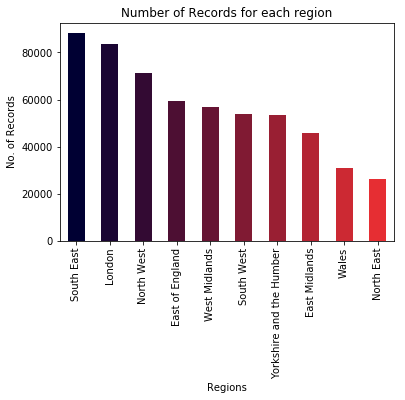

In [14]:
create_bar_plot('bar', data, 'Region', regions, 'Number of Records for each region', 'Regions', 'No. of Records')

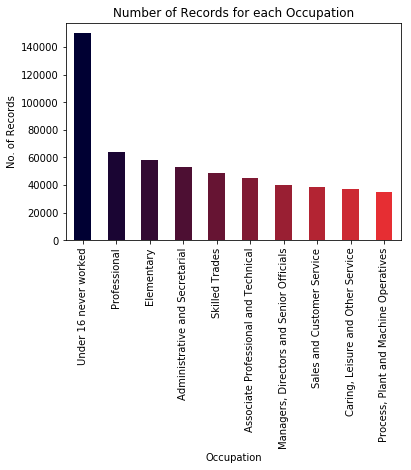

In [15]:
create_bar_plot('bar', data, 'Occupation', occupations, 'Number of Records for each Occupation', 'Occupation', 'No. of Records')

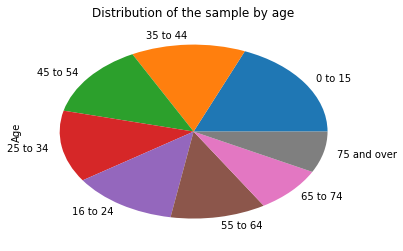

In [16]:
create_pie_plot('pie', data, 'Age', ages, 'Distribution of the sample by age')

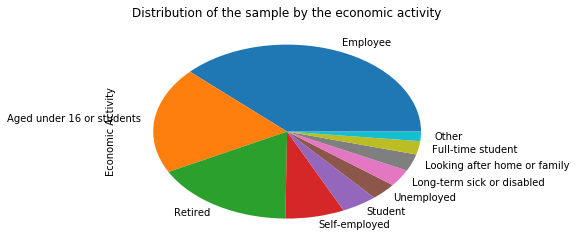

In [17]:
create_pie_plot('pie', data, 'Economic Activity', economic_acts, 'Distribution of the sample by the economic activity')

In [ ]:
columns = ["Person ID", "Region", "Residence type", "Family Composition", "Population base", "Sex", "Age",
          "Marital status", "Student", "Country of birth", "Health", "Ethnic group", "Religion", 
           "Economic activity", "Occupation", "Industry", "Hours worked per week", "Approximated social grade"]
def interactBarPlot(column):
    create_bar_plot_noname('bar', data, column, 'Interactive bar plot', column, '')
    
interact(interactBarPlot, column=columns);

In [168]:
def group(df, col1, col2):
    return df.groupby([col1, col2]).size()

In [19]:
print(tabulate(group(data, 'Region', 'Industry').reset_index(name='count'), headers=["Index", 'Region', 'Industry', "Count"], tablefmt="fancy_grid"))

╒═════════╤═══════════╤════════════╤═════════╕
│   Index │ Region    │   Industry │   Count │
╞═════════╪═══════════╪════════════╪═════════╡
│       0 │ E12000001 │         -9 │    6854 │
├─────────┼───────────┼────────────┼─────────┤
│       1 │ E12000001 │          1 │     132 │
├─────────┼───────────┼────────────┼─────────┤
│       2 │ E12000001 │          2 │    2851 │
├─────────┼───────────┼────────────┼─────────┤
│       3 │ E12000001 │          3 │    1574 │
├─────────┼───────────┼────────────┼─────────┤
│       4 │ E12000001 │          4 │    3087 │
├─────────┼───────────┼────────────┼─────────┤
│       5 │ E12000001 │          5 │    1300 │
├─────────┼───────────┼────────────┼─────────┤
│       6 │ E12000001 │          6 │    1438 │
├─────────┼───────────┼────────────┼─────────┤
│       7 │ E12000001 │          7 │     524 │
├─────────┼───────────┼────────────┼─────────┤
│       8 │ E12000001 │          8 │    1883 │
├─────────┼───────────┼────────────┼─────────┤
│       9 │ E

In [176]:
def create_3d_plot(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.xticks([-9, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.yticks(np.arange(10), df.index.levels[0])
    for x in range(len(df.index.levels[0])):
        xs = df[df.index.levels[0][x]]
        ax.bar(xs.index, xs.values, zs=x, zdir='y')
    plt.show()

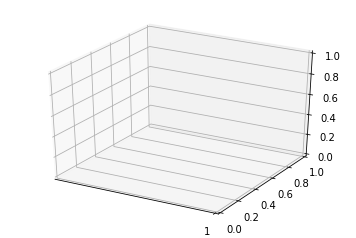

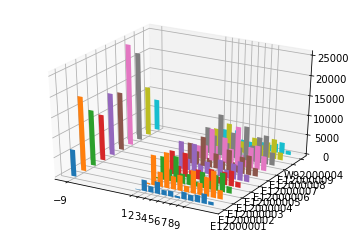

In [177]:
create_3d_plot(group(data, 'Region', 'Industry'))

In [24]:
create_3d_plot(group(data, 'Occupation', 'Approximated Social Grade'))

NameError: name 'np' is not defined

In [179]:
def create_plotly_plot(df, col1, col2, title):
    gf = df.groupby(col1)
    column1 = df[col1].unique()
    out = []
    for column, fill_color in zip(column1, colours):  # [start:stop:step]
        group_1 = gf.get_group(column)
        column2 = group_1[col2].tolist()
        length = len(column2)
        z_axis = [column] * length
        count = group_1['count'].tolist()
        zeros = [0] * length
        out.append(dict(
            type='scatter3d',
            mode='lines',
            x=column2 + column2[::-1] + [column2[0]],
            y=z_axis * 2 + [z_axis[0]],
            z=count + zeros + [count[0]],
            name='',
            surfacecolor=fill_color,
            surfaceaxis=1,
            line=dict(
                color='black',
                width=4
            ),
        ))

    layout = dict(title=title, showlegend=False,scene=dict(xaxis=dict(title=''),yaxis=dict(title=''),zaxis=dict(title=''),camera=dict(eye=dict(x=-1.7, y=-1.7, z=0.5))))
    fig = dict(data=out, layout=layout)
    return py.iplot(fig, validate=False, filename='3d-lines')

In [180]:
create_plotly_plot(group(data, 'Region', 'Industry').reset_index(name='count'), 'Region', 'Industry', 'Region vs Industry')

In [ ]:
create_plotly_plot(group(data, 'Occupation', 'Approximated Social Grade').reset_index(name='count'), 'Occupation', 'Approximated Social Grade', 'Occupation vs Approximated Social Grade')

In [181]:
def create_map(df, col1):
    regions_geo = 'regions.geojson'
    df1 = df.groupby('Region').size()
    map_1 = folium.Map(location=[52.958, 0.7], zoom_start=7)
    map_1.choropleth(geo_path=regions_geo, data=df1,
                     columns=['region_code', 'Size'],
                     key_on='properties.region_code',
                     fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
                     legend_name='No. of people from region in census')
    
    for region in df['Region'].unique().tolist():
        df1 = df[df['Region'].str.contains(region)]
        bar = vincent.Bar(df1[col1].value_counts(), width=350, height=250)
        xtitle = col1 + "in: "+ regions.get(region)
        bar.axis_titles(x=xtitle, y='')
        loc = coordinates.get(region)
        popup1 = folium.Popup(max_width=800, ).add_child(folium.Vega(bar, width=400, height=300))
        folium.RegularPolygonMarker(loc, fill_color='#43d9de', radius=12, popup=popup1).add_to(map_1)
    
    return map_1

In [182]:
create_map(data, 'Country of Birth')

In [26]:
def query(df):
    df.columns = df.columns.map(lambda x: x.replace(' ', '_'))
    
    print("Number of economically active people per region:")
    df = df.replace({'Region': regions})
    df_eapr = df.query('Economic_Activity > 0 & Economic_Activity < 5')
    print(df_eapr.groupby('Region').size(), '\n')
    create_bar_plot('bar', df_eapr, 'Region', regions, 'Number of economically active people per region', 'Region', 'No. people')
    
    print("Number of working hours per week for students:")
    df = df.replace({'Hours_worked_per_week': hours_worked})
    df_whfs = df.query('Economic_Activity == 4 | Economic_Activity == 6')    
    print(df_whfs.groupby('Hours_worked_per_week').size(), '\n')
    create_bar_plot('bar', df_whfs, 'Hours_worked_per_week', regions, 'Number of working hours per week for students', 'No. Hours', 'No. Students')

    print("Number of economically active people by age:")
    df = df.replace({'Age': ages})
    df_eapa = df.query('Economic_Activity == 1 | Economic_Activity == 2')
    print(df_eapa.groupby('Age').size(), '\n')
    create_bar_plot('bar', df_eapa, 'Age', ages, 'Number of economically active people per age group', 'Age', 'No. people')

    print("Discrepancy between student status and economic activity:")
    if(len(df.query('(Economic_Activity != 4 | Economic_Activity != 6) & Student == True')) > 0):
        print("Discrepencies exist")
    else:
        print("No Discrepencies exist")


Number of economically active people per region:
Region
East Midlands               23106
East of England             30568
London                      44454
North East                  12897
North West                  35204
South East                  45551
South West                  27453
Wales                       14877
West Midlands               27930
Yorkshire and the Humber    26843
dtype: int64 



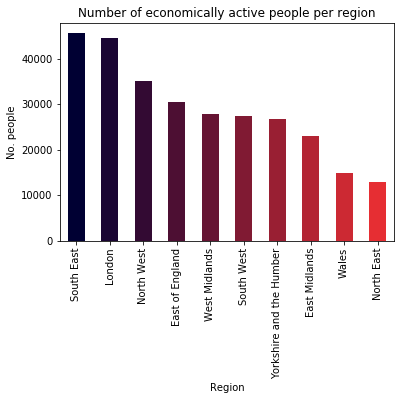

Number of working hours per week for students:
Hours_worked_per_week
15 or less hours                     6465
16 to 30 hours                       2334
31 to 48 hours                       1683
49 or more hours                      281
Under 16, student or not working    28110
dtype: int64 



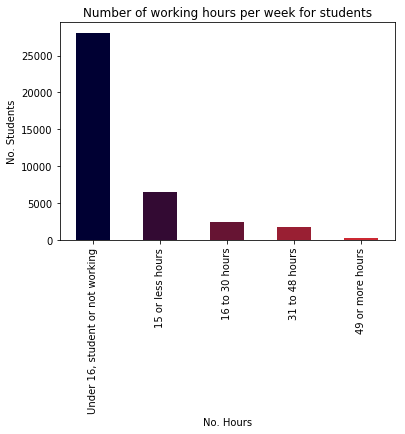

Number of economically active people by age:
Age
16 to 24       25499
25 to 34       58181
35 to 44       62610
45 to 54       62255
55 to 64       38793
65 to 74        7852
75 and over     1467
dtype: int64 



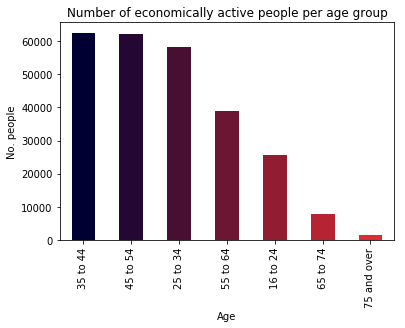

Discrepancy between student status and economic activity:
Discrepencies exist


In [28]:
query(data)

In [388]:
def analyse_extension(df):
    print('Total no of records: ', df.shape[0])
    print(df.groupby('Region').size(), '\n')
    print(df.groupby('RESIDENCE_TYPE').size(), '\n')
    print(df.groupby('Family_Composition').size(), '\n')
    print(df.groupby('sex').size(), '\n')
    print(df.groupby('age').size(), '\n')
    print(df.groupby('Marital_Status').size(), '\n')
    print(df.groupby('student').size(), '\n')
    print(df.groupby('Country_Of_Birth').size(), '\n')
    print(df.groupby('health').size(), '\n')
    print(df.groupby('Ethnic_Group').size(), '\n')
    print(df.groupby('religion').size(), '\n')
    print(df.groupby('Economic_Activity').size(), '\n')
    print(df.groupby('Occupation').size(), '\n')
    print(df.groupby('industry').size(), '\n')
    print(df.groupby('Hours_Worked_Per_Week').size(), '\n')
    print(df.groupby('Approximate_Social_Grade').size(), '\n')

In [412]:
def read_csv_extension(file_name):
    df = pd.read_csv(file_name, error_bad_lines=False)
    df = df[df['Region'].isin(['S92000003'])]
    df = df[df['RESIDENCE_TYPE'].isin(['P', 'C'])]
    df = df[df['Family_Composition'].isin(['0', '1', '2', '3', '4', '5', 'X'])]
    df = df[df['sex'].isin([1, 2])]
    df = df[df['age'].isin([1, 2, 3, 4, 5, 6, 7, 8])]
    df = df[df['Marital_Status'].isin([1, 2, 3, 4, 5])]
    df = df[df['student'].isin([1, 2])]
    df = df[df['Country_Of_Birth'].isin([1, 2])]
    df = df[df['health'].isin([1, 2, 3, 4, 5])]
    df = df[df['Ethnic_Group'].isin([1, 2, 3, 4, 5, 6])]
    df = df[df['religion'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9])]
    df = df[df['Economic_Activity'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'X'])]
    df = df[df['Occupation'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'X'])]
    df = df[df['industry'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', 'X'])]
    df = df[df['Hours_Worked_Per_Week'].isin(['1', '2', '3', '4', 'X'])]
    df['Approximate_Social_Grade'] = df['Approximate_Social_Grade'].astype(object)
    df = df[df['Approximate_Social_Grade'].isin(['1', '2', '3', '4', 'X'])]
    df.duplicated(['Record_Number'], keep='first')
    return df

In [ ]:
regions = {'S92000003': 'Scotland'}

family = {'0':'Not in a family', 
          '1': 'Married/same-sex civil partnership couple family', 
          '2': 'Cohabiting couple family',
          '3': 'Lone parent family (male head)'
          '4': 'Lone parent family (female lead)'
          '5'. 'Other related family'
          'X': 'No code required (residents of a communal establishment)'


occupations = {'1': "Managers, Directors and Senior Officials", '2': "Professional",
               '3': "Associate Professional and Technical", '4': "Administrative and Secretarial",
               '5': "Skilled Trades", '6': "Caring, Leisure and Other Service", '7': "Sales and Customer Service",
               '8': "Process, Plant and Machine Operatives", '9': "Elementary", 'X': "Under 16 never worked"}

ages = {1: "0 to 15", 2: "16 to 24", 3: "25 to 34", 4: "35 to 44",
        5: "45 to 54", 6: "55 to 64", 7: "65 to 74", 8: "75 and over"}

economic_acts = {'1': "Employee", '2': "Self-employed", '3': "Unemployed", '4': "Full-time student",
                 '5': "Retired", '6': "Student", '7': "Looking after home or family",
                 '8': "Long-term sick or disabled", '9': "Other", 'X': "Aged under 16 or students"}

industry = {'1': 'Agriculture, forestry and fishing'
            '2': 'Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply'
            '3': 'Construction'
            '4': 'Wholesale and retail trade; Repair of motor vehicles and motorcycles'
            '5': 'Accommodation and food service activities'
            '6': 'Transport and storage; Information and communication'
            '7': 'Financial and insurance activities'
            '8': 'Real estate activities; Professional scientific and technical activities; Administrative and support service activities'
            '9': 'Public administration and defence'
            '10': 'Education'
            '11': 'Human health and social work activities'
            '12': 'Arts; entertainment and recreation'
            '13':'Other'
            'X':'No code required (People aged under 16 and people who have never worked)'}


hours_worked = {'1': "15 or less hours", '2': "16 to 30 hours", '3': "31 to 48 hours", '4': "49 or more hours", 'X': "Under 16, student or not working"}

In [413]:
extension_data = read_csv_extension('Scot_data.csv')

In [414]:
analyse_extension(extension_data)

Total no of records:  63388
Region
S92000003    63388
dtype: int64 

RESIDENCE_TYPE
C     1149
P    62239
dtype: int64 

Family_Composition
0    11716
1    33337
2     7660
3     1019
4     7757
5      750
X     1149
dtype: int64 

sex
1    30692
2    32696
dtype: int64 

age
1    10980
2     7541
3     8056
4     8963
5     9336
6     7854
7     5731
8     4927
dtype: int64 

Marital_Status
1    29611
2    23918
3     1668
4     4159
5     4032
dtype: int64 

student
1    11991
2    51397
dtype: int64 

Country_Of_Birth
1    59045
2     4343
dtype: int64 

health
1    33436
2    18825
3     7544
4     2759
5      824
dtype: int64 

Ethnic_Group
1    60901
2      199
3     1667
4      376
5       80
6      165
dtype: int64 

religion
1    23309
2    34199
3      113
4      187
5       61
6      906
7      116
8      162
9     4335
dtype: int64 

Economic_Activity
1    25350
2     3623
3     2183
4     1743
5    11527
6     2691
7     1741
8     2543
9     1007
X    10980
dtype: int64 
